In [40]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X ,y = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
X.shape, y.shape

((400, 4096), (400,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [6]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]))

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4096)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')])

In [17]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
weights, biases = model.get_layer('dense').get_weights()

In [19]:
weights.shape, biases.shape

((4096, 100), (100,))

In [20]:
model.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
10/10 [==============================] - 1s 33ms/step - loss: 3.9171 - accuracy: 0.0156 - val_loss: 3.7136 - val_accuracy: 0.0375
Epoch 2/30
10/10 [==============================] - 0s 11ms/step - loss: 3.7207 - accuracy: 0.0344 - val_loss: 3.6643 - val_accuracy: 0.0375
Epoch 3/30
10/10 [==============================] - 0s 13ms/step - loss: 3.6619 - accuracy: 0.0375 - val_loss: 3.6702 - val_accuracy: 0.0250
Epoch 4/30
10/10 [==============================] - 0s 11ms/step - loss: 3.6499 - accuracy: 0.0406 - val_loss: 3.6571 - val_accuracy: 0.0750
Epoch 5/30
10/10 [==============================] - 0s 12ms/step - loss: 3.6547 - accuracy: 0.0562 - val_loss: 3.6468 - val_accuracy: 0.0250
Epoch 6/30
10/10 [==============================] - 0s 13ms/step - loss: 3.6350 - accuracy: 0.0437 - val_loss: 3.6170 - val_accuracy: 0.0750
Epoch 7/30
10/10 [==============================] - 0s 13ms/step - loss: 3.6252 - accuracy: 0.0562 - val_loss: 3.6928 - val_accuracy: 0.0250
Epoch 8/30
10

In [21]:
model_history_df = pd.DataFrame(model.history.history)

In [22]:
model_history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,3.917145,0.015625,3.713628,0.0375
1,3.720682,0.034375,3.664291,0.0375
2,3.661884,0.037500,3.670154,0.0250
3,3.649909,0.040625,3.657148,0.0750
4,3.654736,0.056250,3.646832,0.0250


<Axes: >

<Figure size 1000x300 with 0 Axes>

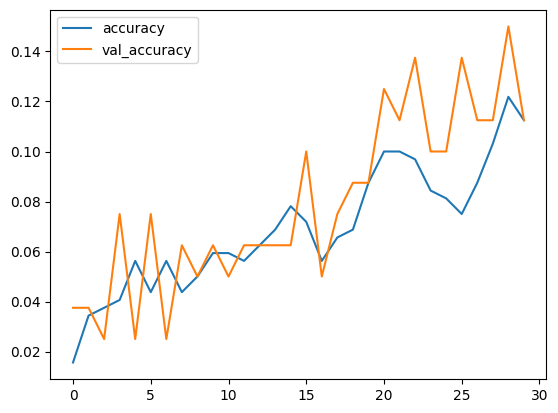

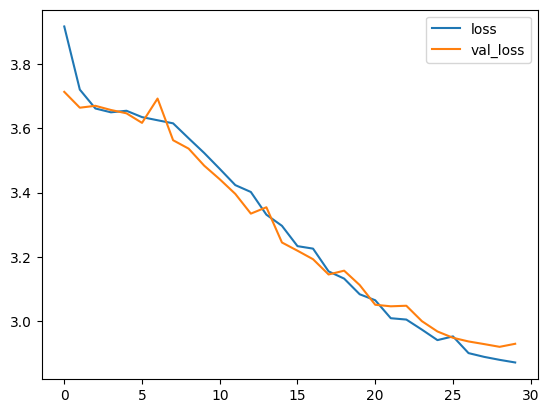

In [23]:
plt.figure(figsize=(10,3))
model_history_df[['accuracy','val_accuracy']].plot()
model_history_df[['loss','val_loss']].plot()

We can see the model is overfitting.

In [58]:
X, y = sklearn.datasets.fetch_california_housing(as_frame=False,  return_X_y=True)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [63]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

Now lets make the model. Regression:
We normalize the inputs,
dont use acitvation in output layer
use relu. Lets use the functional api to make multi input and output networks

In [67]:
X_train.shape[1:]

(8,)

In [121]:
# Wide and Deep Neural Network
tf.keras.backend.clear_session()
tf.random.set_seed(42)
input_ = tf.keras.layers.Input(shape=(8,))
normalize_layer = tf.keras.layers.Normalization()
normalized = tf.keras.layers.Normalization()(input_)
hidden1 = tf.keras.layers.Dense(40, activation='relu')(normalized)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([hidden2, normalized])
output = tf.keras.layers.Dense(1)(concat)

In [122]:
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [123]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 8)                    17        ['input_1[0][0]']             
 tion)                                                                                            
                                                                                                  
 dense (Dense)               (None, 40)                   360       ['normalization_1[0][0]']     
                                                                                                  
 dense_1 (Dense)             (None, 30)                   1230      ['dense[0][0]']           

In [125]:
normalize_layer.adapt(X_train)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='mse',
              metrics='RootMeanSquaredError')
model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_valid, y_valid), )

Epoch 1/30
258/258 [==============================] - 2s 4ms/step - loss: 26.1149 - root_mean_squared_error: 5.1103 - val_loss: 0.8005 - val_root_mean_squared_error: 0.8947
Epoch 2/30
258/258 [==============================] - 1s 2ms/step - loss: 0.8268 - root_mean_squared_error: 0.9093 - val_loss: 0.7485 - val_root_mean_squared_error: 0.8652
Epoch 3/30
258/258 [==============================] - 1s 2ms/step - loss: 0.7969 - root_mean_squared_error: 0.8927 - val_loss: 0.7487 - val_root_mean_squared_error: 0.8653
Epoch 4/30
258/258 [==============================] - 1s 2ms/step - loss: 1.3913 - root_mean_squared_error: 1.1795 - val_loss: 0.7163 - val_root_mean_squared_error: 0.8464
Epoch 5/30
258/258 [==============================] - 1s 2ms/step - loss: 1.7228 - root_mean_squared_error: 1.3125 - val_loss: 1.0538 - val_root_mean_squared_error: 1.0265
Epoch 6/30
258/258 [==============================] - 1s 2ms/step - loss: 5.3781 - root_mean_squared_error: 2.3191 - val_loss: 15.5773 - va

In [126]:
def plot_metrics(model):
  model_hist = pd.DataFrame(model.history.history)
  plt.figure(figsize=(10,3))
  ax = plt.subplot(121)
  model_hist[['loss', 'val_loss']].plot(ax=ax)
  ax = plt.subplot(122)
  model_hist[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(ax=ax)

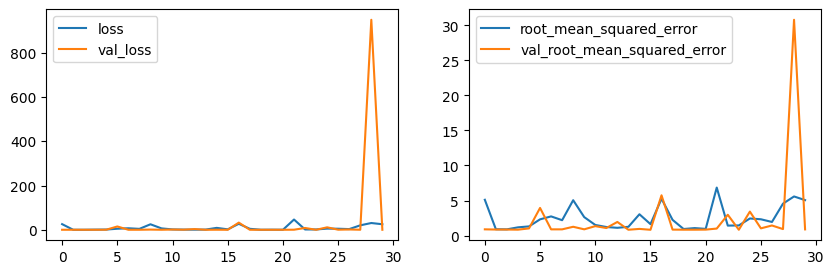

In [127]:
plot_metrics(model)

This model is good i guess. LEts evaluate

In [128]:
model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 2ms/step - loss: 0.6891 - root_mean_squared_error: 0.8301


[0.689113438129425, 0.83012855052948]

This time with batch size 64

In [132]:
model.history.history

{}

Normal sequential network

In [134]:
tf.keras.backend.clear_session()
norm_layer = tf.keras.layers.Normalization(input_shape=(8,))
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1248 (4.88 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


In [142]:
norm_layer.adapt(X_train)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse', metrics=['RootMeanSquaredError'])
model.fit(X_train, y_train, epochs=30, batch_size=64,validation_data=(X_valid, y_valid) )

Epoch 1/30
258/258 [==============================] - 2s 5ms/step - loss: 0.2469 - root_mean_squared_error: 0.4969 - val_loss: 0.2658 - val_root_mean_squared_error: 0.5155
Epoch 2/30
258/258 [==============================] - 2s 8ms/step - loss: 0.2485 - root_mean_squared_error: 0.4985 - val_loss: 0.2650 - val_root_mean_squared_error: 0.5147
Epoch 3/30
258/258 [==============================] - 2s 6ms/step - loss: 0.2501 - root_mean_squared_error: 0.5001 - val_loss: 0.2669 - val_root_mean_squared_error: 0.5166
Epoch 4/30
258/258 [==============================] - 2s 9ms/step - loss: 0.2461 - root_mean_squared_error: 0.4960 - val_loss: 0.2739 - val_root_mean_squared_error: 0.5234
Epoch 5/30
258/258 [==============================] - 2s 9ms/step - loss: 0.2451 - root_mean_squared_error: 0.4951 - val_loss: 0.2695 - val_root_mean_squared_error: 0.5191
Epoch 6/30
258/258 [==============================] - 2s 6ms/step - loss: 0.2462 - root_mean_squared_error: 0.4962 - val_loss: 0.2693 - val_

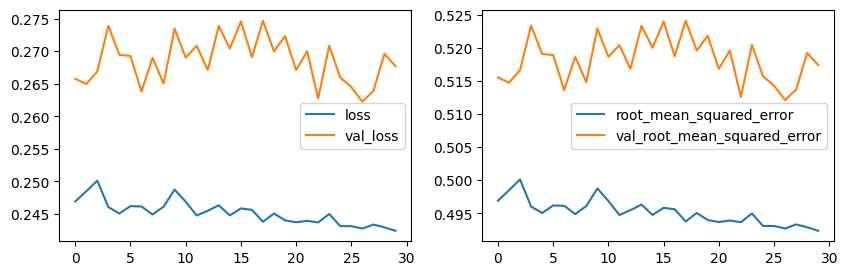

In [143]:
plot_metrics(model)

Very overfitting, But sequential is better than wide and deep network

In [144]:
model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 3ms/step - loss: 0.2829 - root_mean_squared_error: 0.5319


[0.2828982472419739, 0.5318818092346191]

In [145]:
model.save(filepath='mymodel')